In [2]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../../data/ST001937_AN003150.csv')

Dropping not needed columns and renaming the Phenotypes column to labels

In [3]:
df = df.drop(['Sample ID', 'RAW_FILE_NAME'], axis=1)
df['Phenotypes'] = df['Phenotypes'].apply(lambda x: 0 if x == 'Healthy Controls' else 1 if x == 'Maligant SPNS' else 2)

Filling missing values with the mean

In [4]:
df.fillna(df.mean(), inplace=True)

Performing SVM RBF classification and plotting the results

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns

# Splitting the data into features (X) and labels (y)
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista di valori gamma da testare da 0.001 a 1 con passo di 0.001
gamma_values = np.arange(0.0001, 0.011, 0.00001)

# Liste per memorizzare gli accuracies e confusion matrices corrispondenti
accuracies = []
conf_matrices = []

# Iterazione su diversi valori di gamma
for gamma in gamma_values:
    # Performing SVM RBF classification
    svm_classifier = SVC(kernel='rbf', C=13.2, gamma=gamma, random_state=42)
    svm_classifier.fit(X_train, y_train)

    # Predicting the labels for the test set
    y_pred = svm_classifier.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Aggiunta delle metriche alle liste
    accuracies.append(accuracy)
    conf_matrices.append(conf_matrix)

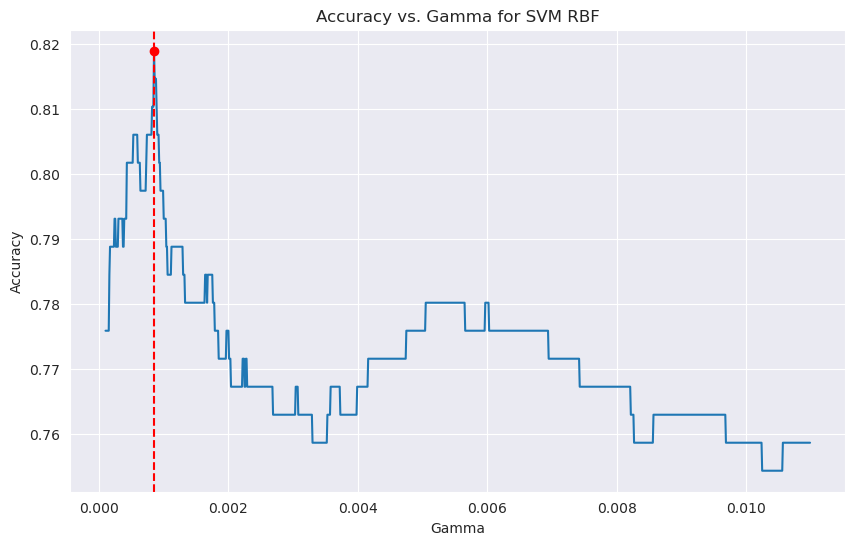

In [6]:
from scipy.interpolate import make_interp_spline

# Plotting the accuracy results
plt.figure(figsize=(10, 6))


plt.plot(gamma_values, accuracies)

plt.title('Accuracy vs. Gamma for SVM RBF')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
# Flagging the best accuracy value with a vertical line and a dot on the curve and the corresponding gamma value and accuracy
plt.axvline(gamma_values[np.argmax(accuracies)], color='r', linestyle='--')
plt.plot(gamma_values[np.argmax(accuracies)], np.max(accuracies), 'ro')
plt.show()

Visualizzazione delle confusion matrices per il best gamma

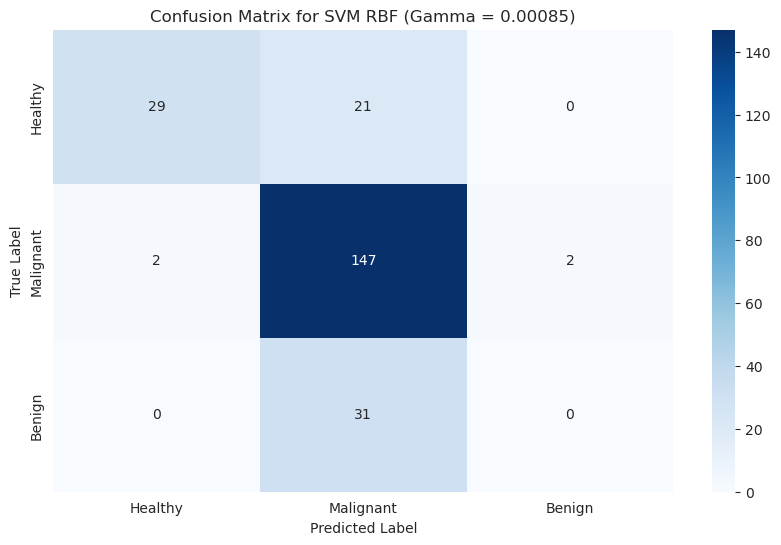

Accuracy: 0.8189655172413793


In [7]:
best_gamma = gamma_values[np.argmax(accuracies)]
best_conf_matrix = conf_matrices[np.argmax(accuracies)]
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=['Healthy', 'Malignant', 'Benign'], yticklabels=['Healthy', 'Malignant', 'Benign'])
plt.title('Confusion Matrix for SVM RBF (Gamma = {})'.format(best_gamma))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Accuracy: {}'.format(np.max(accuracies)))

Performing PCA and plotting the results

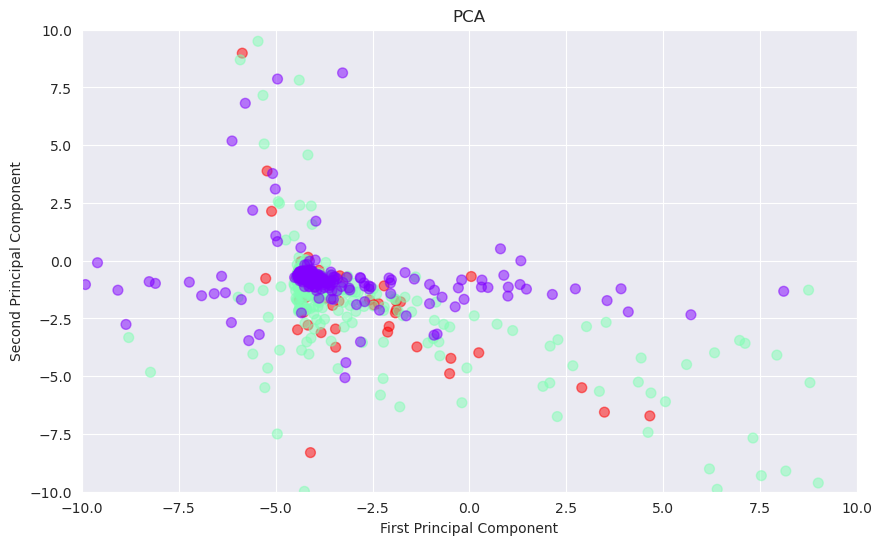

In [8]:
from sklearn.decomposition import PCA

# Creating a PCA object
pca = PCA(n_components=2)

# Fitting the PCA object to the features
pca.fit(X)

# Transforming the features
X_pca = pca.transform(X)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, alpha=0.5, cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA')
plt.show()